<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_0_8)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_add_delta_-0.8_n20.csv',
 'data_add_delta_-0.8_n250.csv',
 'data_add_delta_-0.8_n120.csv',
 'data_add_delta_-0.8_n60.csv',
 'data_add_delta_-0.8_n30.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.8_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,53.262948,98.080266,38.860777,-0.040688,200.163303,200.160214,0.003089
1,0.0,1.0,20.023147,36.471332,80.327226,0.158435,146.980141,146.889803,0.090338
2,0.0,2.0,59.988586,99.689539,45.833488,-0.174764,215.336849,215.455799,-0.118950
3,0.0,3.0,96.002275,47.527576,95.837595,-0.247078,249.120369,249.347164,-0.226795
4,0.0,4.0,45.237584,54.645970,93.111254,-0.337769,202.657039,203.003806,-0.346767
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,31.877837,86.647545,53.511399,0.129948,182.166729,182.019612,0.147117
59996,999.0,56.0,20.784740,25.113350,67.455395,-0.054364,123.299121,123.469285,-0.170164
59997,999.0,57.0,65.268124,62.453344,28.079800,0.169637,165.970905,165.858060,0.112845
59998,999.0,58.0,43.411422,22.607025,23.333061,0.421564,99.773072,99.531066,0.242007


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,53.262948,98.080266,38.860777,-0.040688,200.163303,200.160214,0.003089
1,0.0,1.0,20.023147,36.471332,80.327226,0.158435,146.980141,146.889803,0.090338
2,0.0,2.0,59.988586,99.689539,45.833488,-0.174764,215.336849,215.455799,-0.118950
3,0.0,3.0,96.002275,47.527576,95.837595,-0.247078,249.120369,249.347164,-0.226795
4,0.0,4.0,45.237584,54.645970,93.111254,-0.337769,202.657039,203.003806,-0.346767
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,31.877837,86.647545,53.511399,0.129948,182.166729,182.019612,0.147117
59996,999.0,56.0,20.784740,25.113350,67.455395,-0.054364,123.299121,123.469285,-0.170164
59997,999.0,57.0,65.268124,62.453344,28.079800,0.169637,165.970905,165.858060,0.112845
59998,999.0,58.0,43.411422,22.607025,23.333061,0.421564,99.773072,99.531066,0.242007


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    53.262948  98.080266  38.860777  ...  200.163303  200.160214  0.003089
      1.0    20.023147  36.471332  80.327226  ...  146.980141  146.889803  0.090338
      2.0    59.988586  99.689539  45.833488  ...  215.336849  215.455799 -0.118950
      3.0    96.002275  47.527576  95.837595  ...  249.120369  249.347164 -0.226795
      4.0    45.237584  54.645970  93.111254  ...  202.657039  203.003806 -0.346767
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   31.877837  86.647545  53.511399  ...  182.166729  182.019612  0.147117
      56.0   20.784740  25.113350  67.455395  ...  123.299121  123.469285 -0.170164
      57.0   65.268124  62.453344  28.079800  ...  165.970905  165.858060  0.112845
      58.0   43.411422  22.607025  23.333061  ...   99.773072   99.531066  0.242007
      59.0   67.126956  25.705038  89.007489  ...  191.788266  191.876460 -0.088194

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    53.262948  98.080266  38.860777  ...  200.163303  200.160214  0.003089
      1.0    20.023147  36.471332  80.327226  ...  146.980141  146.889803  0.090338
      2.0    59.988586  99.689539  45.833488  ...  215.336849  215.455799 -0.118950
      3.0    96.002275  47.527576  95.837595  ...  249.120369  249.347164 -0.226795
      4.0    45.237584  54.645970  93.111254  ...  202.657039  203.003806 -0.346767
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   31.877837  86.647545  53.511399  ...  182.166729  182.019612  0.147117
      56.0   20.784740  25.113350  67.455395  ...  123.299121  123.469285 -0.170164
      57.0   65.268124  62.453344  28.079800  ...  165.970905  165.858060  0.112845
      58.0   43.411422  22.607025  23.333061  ...   99.773072   99.531066  0.242007
      59.0   67.126956  25.705038  89.007489  ...  191.788266  191.876460 -0.088194

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,53.262948,98.080266,38.860777,-0.040688,200.163303,200.160214,0.003089
1,0.0,1.0,20.023147,36.471332,80.327226,0.158435,146.980141,146.889803,0.090338
2,0.0,2.0,59.988586,99.689539,45.833488,-0.174764,215.336849,215.455799,-0.118950
3,0.0,3.0,96.002275,47.527576,95.837595,-0.247078,249.120369,249.347164,-0.226795
4,0.0,4.0,45.237584,54.645970,93.111254,-0.337769,202.657039,203.003806,-0.346767
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,31.877837,86.647545,53.511399,0.129948,182.166729,182.019612,0.147117
59996,999.0,56.0,20.784740,25.113350,67.455395,-0.054364,123.299121,123.469285,-0.170164
59997,999.0,57.0,65.268124,62.453344,28.079800,0.169637,165.970905,165.858060,0.112845
59998,999.0,58.0,43.411422,22.607025,23.333061,0.421564,99.773072,99.531066,0.242007


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    53.262948  98.080266  38.860777  ...  200.163303  200.160214  0.003089
      1.0    20.023147  36.471332  80.327226  ...  146.980141  146.889803  0.090338
      2.0    59.988586  99.689539  45.833488  ...  215.336849  215.455799 -0.118950
      3.0    96.002275  47.527576  95.837595  ...  249.120369  249.347164 -0.226795
      4.0    45.237584  54.645970  93.111254  ...  202.657039  203.003806 -0.346767
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   31.877837  86.647545  53.511399  ...  182.166729  182.019612  0.147117
      56.0   20.784740  25.113350  67.455395  ...  123.299121  123.469285 -0.170164
      57.0   65.268124  62.453344  28.079800  ...  165.970905  165.858060  0.112845
      58.0   43.411422  22.607025  23.333061  ...   99.773072   99.531066  0.242007
      59.0   67.126956  25.705038  89.007489  ...  191.788266  191.876460 -0.088194

[60000 rows x 7 columns]

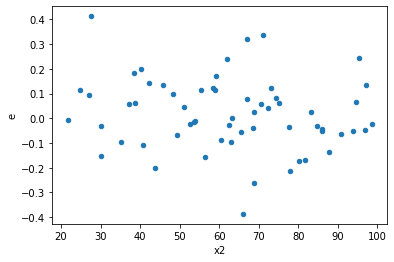

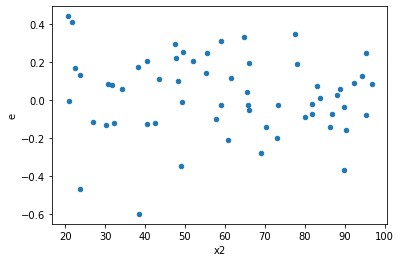

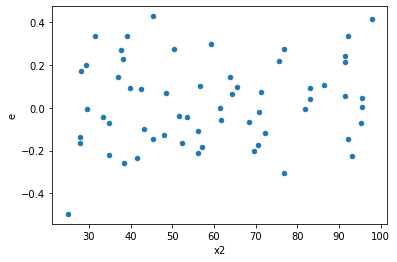

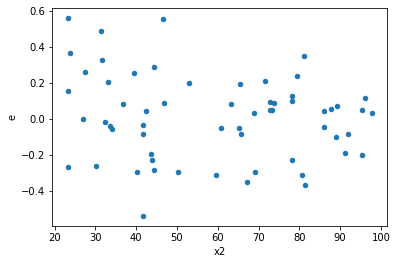

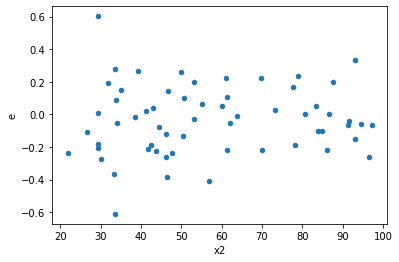

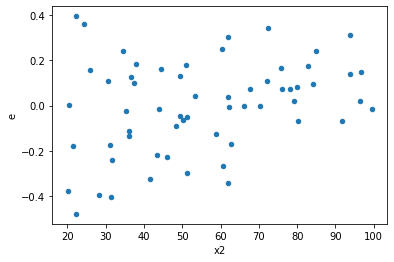

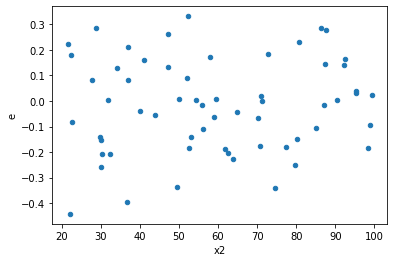

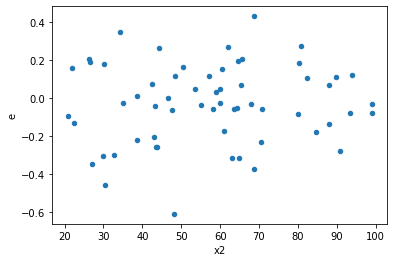

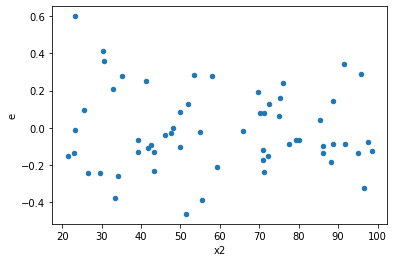

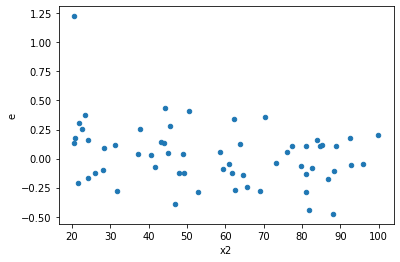

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
9.0,21.0,21.0,0.7023759995697079,0.9229439938365651,0.03344647616998609,0.043949713992217386,1.314031223165345,0.5369693571682213,0.7315153214158894,0.2684846785841106,Reject005=1 : Homoscedasticity
43.0,21.0,21.0,0.4446447328748187,0.6020701776788205,0.0211735587083247,0.028670008460896217,1.3540476995784454,0.49335700075791733,0.7533214996210413,0.24667850037895866,Reject005=1 : Homoscedasticity
50.0,21.0,21.0,0.8621614413231968,0.9204429173185,0.04105530672967604,0.043830615110404765,1.0675992606510634,0.8822696289158154,0.5588651855420923,0.4411348144579077,Reject005=1 : Homoscedasticity
66.0,21.0,21.0,0.6979915698036,0.8018398884028618,0.03323769380017143,0.0381828518287077,1.1487816230051067,0.7535800810307416,0.6232099594846292,0.3767900405153708,Reject005=1 : Homoscedasticity
73.0,21.0,21.0,0.6047915771648886,0.8675068721659004,0.028799598912613744,0.04130985105551906,1.4343898045547445,0.41529639902807935,0.7923518004859603,0.20764819951403968,Reject005=1 : Homoscedasticity
81.0,21.0,21.0,0.5829138503562389,0.6395632193407759,0.027757802397916136,0.030455391397179805,1.0971830896622488,0.8337013377487243,0.5831493311256378,0.4168506688743622,Reject005=1 : Homoscedasticity
83.0,21.0,21.0,0.6388248273414723,1.0363685050887301,0.030420229873403443,0.049350881194701435,1.6223046768574603,0.27557665692189737,0.8622116715390513,0.13778832846094868,Reject005=1 : Homoscedasticity
100.0,21.0,21.0,0.4984164508019184,0.604566242419208,0.023734116704853255,0.02878886868662895,1.2129740931433979,0.6622397335838759,0.668880133208062,0.33111986679193794,Reject005=1 : Homoscedasticity
123.0,21.0,21.0,0.3781568286088788,0.39982464197816675,0.01800746802899423,0.01903926866562699,1.057298484993639,0.8996167321467163,0.5501916339266418,0.44980836607335817,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,0.9973695008417036,0.5114642687708759,0.047493785754366837,0.02435544137004171,0.5128132235237184,0.1339832481489006,Reject005=1 : Homoscedasticity
1.0,21.0,21.0,1.1576701856501155,0.4541878048907388,0.05512715169762455,0.0216279907090828,0.3923291888489635,0.03733388093708432,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,1.0939228359008153,0.5435736914988133,0.052091563614324536,0.02588446149994349,0.4969031394716204,0.11688954469003586,Reject005=1 : Homoscedasticity
3.0,21.0,21.0,1.043598235768815,0.3599083271151638,0.04969515408422928,0.017138491767388752,0.3448724947776676,0.0183981715291702,Reject005=0 : Heteroscedasticity
4.0,21.0,21.0,1.2908671601449933,0.838457883048178,0.0614698647688092,0.039926565859437047,0.6495307254961854,0.3304035842450951,Reject005=1 : Homoscedasticity
5.0,21.0,21.0,0.9220441858713386,0.4948817532624291,0.043906865993873265,0.023565797774401386,0.5367223836401747,0.16212729908390622,Reject005=1 : Homoscedasticity
6.0,21.0,21.0,1.638218111628077,0.6376314285365049,0.07801038626800366,0.030363401358881187,0.3892225485792125,0.03580035318922035,Reject005=0 : Heteroscedasticity
7.0,21.0,21.0,1.3997452344607815,0.6153878277075159,0.06665453497432293,0.02930418227178647,0.43964273823341815,0.0663922930317681,Reject005=1 : Homoscedasticity
8.0,21.0,21.0,1.191019622244862,0.5732934547509658,0.05671522010689819,0.027299688321474565,0.4813467755219757,0.10146134104269797,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      669
Reject005=0 : Heteroscedasticity    331
Name: Result_test, dtype: int64